In [175]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
import zipfile
import os
import ast
from sklearn.linear_model import LinearRegression
from matplotlib import style
from sklearn.model_selection import train_test_split

In [176]:
cd

C:\Users\emmam


In [177]:
cd Documents

C:\Users\emmam\Documents


In [178]:
cd Flatiron

C:\Users\emmam\Documents\Flatiron


In [179]:
cd phase_2

C:\Users\emmam\Documents\Flatiron\phase_2


In [180]:
cd film-analytics

C:\Users\emmam\Documents\Flatiron\phase_2\film-analytics


In [181]:
cd data

C:\Users\emmam\Documents\Flatiron\phase_2\film-analytics\data


## Database Connection and Table Overview

In [182]:
conn = sqlite3.connect('im.db')
pd.read_sql("""SELECT name FROM sqlite_master WHERE type='table';""", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [183]:
imdb_movie_info = pd.read_sql("""SELECT primary_title, start_year, averagerating AS average_rating, numvotes AS num_votes, 
primary_name AS director
FROM persons
JOIN directors ON persons.person_id = directors.person_id
JOIN movie_basics ON directors.movie_id = movie_basics.movie_id
JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id;""", conn)

In [184]:
imdb_movie_info

,primary_title,start_year,average_rating,num_votes,director
0,Paano na kaya,2010,6.4,77,Ruel S. Bayani
1,Paano na kaya,2010,6.4,77,Ruel S. Bayani
2,Paano na kaya,2010,6.4,77,Ruel S. Bayani
3,Paano na kaya,2010,6.4,77,Ruel S. Bayani
4,No Other Woman,2011,6.4,256,Ruel S. Bayani
...,...,...,...,...,...
181382,Late Life: The Chien-Ming Wang Story,2018,5.8,281,Frank W Chen
181383,Late Life: The Chien-Ming Wang Story,2018,5.8,281,Frank W Chen
181384,Lilli,2018,5.7,193,Prasobh Vijayan
181385,Polskie gówno,2014,5.2,215,Grzegorz Jankowski


## Loading Datasets

In [185]:
movie_gross = pd.read_csv('bom.movie_gross.csv.gz')
movie_info = pd.read_csv('rt.movie_info.tsv.gz', delimiter='\t')
movie_reviews = pd.read_csv('rt.reviews.tsv.gz', delimiter='\t', encoding='latin-1')
movie_votes = pd.read_csv('tmdb.movies.csv.gz')
movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz')

In [186]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [187]:
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [188]:
movie_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [189]:
movie_votes.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [190]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [191]:
def remove_special_characters(df, column_name):
    df[column_name] = df[column_name].str.replace('[^a-zA-Z0-9 ]', '', regex=True).str.lower().str.strip()
    return df

movie_gross = remove_special_characters(movie_gross, 'title')
movie_votes = remove_special_characters(movie_votes, 'title')
movie_budgets = remove_special_characters(movie_budgets, 'movie')
imdb_movie_info_grouped = remove_special_characters(imdb_movie_info, 'primary_title')

merged_data = pd.merge(movie_gross, movie_votes, how='inner', left_on='title', right_on='title')
merged_data = pd.merge(merged_data, movie_budgets, how='inner', left_on='title', right_on='movie')

df = pd.merge(imdb_movie_info, merged_data, left_on='primary_title', right_on='movie', how='inner')

df.head()

,primary_title,start_year,average_rating,num_votes,director,title,studio,domestic_gross_x,foreign_gross,year,...,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross_y,worldwide_gross
0,diary of a wimpy kid rodrick rules,2011,6.6,23135,David Bowers,diary of a wimpy kid rodrick rules,Fox,52700000.0,19700000,2011,...,8.961,2011-03-25,6.4,492,80,"Mar 25, 2011",diary of a wimpy kid rodrick rules,"$18,000,000","$52,698,535","$73,695,194"
1,diary of a wimpy kid rodrick rules,2011,6.6,23135,David Bowers,diary of a wimpy kid rodrick rules,Fox,52700000.0,19700000,2011,...,8.961,2011-03-25,6.4,492,80,"Mar 25, 2011",diary of a wimpy kid rodrick rules,"$18,000,000","$52,698,535","$73,695,194"
2,diary of a wimpy kid rodrick rules,2011,6.6,23135,David Bowers,diary of a wimpy kid rodrick rules,Fox,52700000.0,19700000,2011,...,8.961,2011-03-25,6.4,492,80,"Mar 25, 2011",diary of a wimpy kid rodrick rules,"$18,000,000","$52,698,535","$73,695,194"
3,diary of a wimpy kid dog days,2012,6.3,19571,David Bowers,diary of a wimpy kid dog days,Fox,49000000.0,28100000,2012,...,11.360,2012-08-03,6.2,440,17,"Aug 3, 2012",diary of a wimpy kid dog days,"$22,000,000","$49,008,662","$77,229,695"
4,diary of a wimpy kid dog days,2012,6.3,19571,David Bowers,diary of a wimpy kid dog days,Fox,49000000.0,28100000,2012,...,11.360,2012-08-03,6.2,440,17,"Aug 3, 2012",diary of a wimpy kid dog days,"$22,000,000","$49,008,662","$77,229,695"


In [192]:
df.shape

(5751, 25)

## Defining Functions

In [193]:
def drop_nans(df, column_name):
    """
    Drop NaNs from specified columns from a Pandas DataFrame.

    :param df: Pandas DataFrame from which NaNs will be dropped.
    :param column_name: Target column.
    """
    df.dropna(subset=column_name, inplace=True)

In [194]:
def drop_columns(df, columns_to_drop):
    """
    Drop specified columns from a Pandas DataFrame.

    :param df: Pandas DataFrame from which columns will be dropped.
    :param columns_to_drop: List of column names to drop.
    """
    df.drop(columns=columns_to_drop, inplace=True)

In [195]:
def format_column(df, columns):
    """
    Format specified columns in the DataFrame to convert currency strings to float.

    Args:
        df (pd.DataFrame): The DataFrame containing the columns to format.
        columns (list): A list of column names to format.

    Returns:
        pd.DataFrame: The DataFrame with specified columns formatted as floats.
    """
    for column in columns:
        if column in df.columns:
            # Convert the column to string, replace commas and dollar signs, then convert to float
            df[column] = df[column].astype(str).str.replace(',', '').str.replace('$', '').astype(float)
    return df

In [196]:
# using function to drop duplicates
df.drop_duplicates(subset=['title', 'release_date_x'], inplace=True)

In [197]:
df.shape

(1346, 25)

In [198]:
# using previously defined functions to format dataframe columns
drop_nans(df, ['studio', 'domestic_gross_x'])
drop_columns(df, ['foreign_gross', 'Unnamed: 0', 'id_x', 'original_language', 'original_title', 'id_y', 
                           'release_date_y', 'domestic_gross_y'])
format_column(df, ['domestic_gross_x', 'worldwide_gross', 'production_budget'])

,primary_title,start_year,average_rating,num_votes,director,title,studio,domestic_gross_x,year,genre_ids,popularity,release_date_x,vote_average,vote_count,movie,production_budget,worldwide_gross
0,diary of a wimpy kid rodrick rules,2011,6.6,23135,David Bowers,diary of a wimpy kid rodrick rules,Fox,52700000.0,2011,"[10751, 35]",8.961,2011-03-25,6.4,492,diary of a wimpy kid rodrick rules,18000000.0,73695194.0
3,diary of a wimpy kid dog days,2012,6.3,19571,David Bowers,diary of a wimpy kid dog days,Fox,49000000.0,2012,"[35, 10751]",11.360,2012-08-03,6.2,440,diary of a wimpy kid dog days,22000000.0,77229695.0
6,diary of a wimpy kid the long haul,2017,4.4,5635,David Bowers,diary of a wimpy kid the long haul,Fox,20700000.0,2017,"[35, 10751]",10.839,2017-05-19,5.6,193,diary of a wimpy kid the long haul,22000000.0,35609577.0
8,blue valentine,2010,7.4,170089,Derek Cianfrance,blue valentine,Wein.,9700000.0,2010,"[18, 10749]",8.994,2010-12-29,6.9,1677,blue valentine,1000000.0,16566240.0
14,the place beyond the pines,2012,7.3,226765,Derek Cianfrance,the place beyond the pines,Focus,21400000.0,2013,"[18, 80]",12.960,2013-03-27,6.9,2781,the place beyond the pines,15000000.0,47011449.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5741,whiplash,2014,8.5,616916,Damien Chazelle,whiplash,SPC,13100000.0,2014,"[18, 10402]",6.298,2013-01-18,7.9,94,whiplash,3300000.0,38969037.0
5742,whiplash,2014,8.5,616916,Damien Chazelle,whiplash,SPC,13100000.0,2014,"[18, 10402]",28.784,2014-10-10,8.4,7908,whiplash,3300000.0,38969037.0
5743,la la land,2016,8.0,436070,Damien Chazelle,la la land,LG/S,151100000.0,2016,"[35, 18, 10749]",16.275,2016-12-09,7.9,10028,la la land,20000000.0,426351163.0
5745,hitman agent 47,2015,5.7,80510,Aleksander Bach,hitman agent 47,Fox,22500000.0,2015,"[28, 80, 53]",14.082,2015-08-21,5.6,1764,hitman agent 47,35000000.0,82182803.0


In [199]:
# format 'studio' column
df['studio'] = df['studio'].str.strip().str.strip('.').str.upper()

In [200]:
df.rename(columns={'domestic_gross_x': 'domestic_gross'}, inplace=True)
df.rename(columns={'release_date_x': 'release_date'}, inplace=True)

In [202]:
df.shape

(1345, 17)

In [203]:
df['release_date'] = pd.to_datetime(df['release_date'])

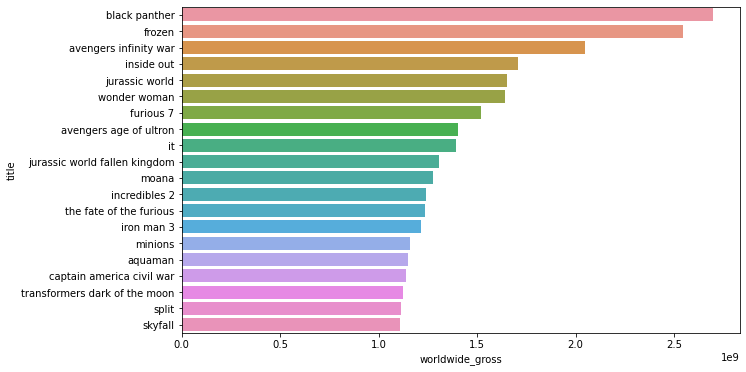

In [219]:
title_grouped = df.groupby('title')['worldwide_gross'].sum().reset_index()

title_sorted = title_grouped.sort_values(by='worldwide_gross', ascending=False).head(20)

plt.figure(figsize=(10, 6))

sns.barplot(x='worldwide_gross', y='title', data=title_sorted)
plt.show()

In [170]:
movie_genres = {
  "genres": [
    {
      "id": 28,
      "name": "action"
    },
    {
      "id": 12,
      "name": "adventure"
    },
    {
      "id": 16,
      "name": "animation"
    },
    {
      "id": 35,
      "name": "comedy"
    },
    {
      "id": 80,
      "name": "crime"
    },
    {
      "id": 99,
      "name": "documentary"
    },
    {
      "id": 18,
      "name": "drama"
    },
    {
      "id": 10751,
      "name": "family"
    },
    {
      "id": 14,
      "name": "fantasy"
    },
    {
      "id": 36,
      "name": "history"
    },
    {
      "id": 27,
      "name": "horror"
    },
    {
      "id": 10402,
      "name": "music"
    },
    {
      "id": 9648,
      "name": "mystery"
    },
    {
      "id": 10749,
      "name": "romance"
    },
    {
      "id": 878,
      "name": "science fiction"
    },
    {
      "id": 10770,
      "name": "tv movie"
    },
    {
      "id": 53,
      "name": "thriller"
    },
    {
      "id": 10752,
      "name": "war"
    },
    {
      "id": 37,
      "name": "western"
    }
  ]
}    

In [171]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd
import ast

# Assuming movie_genres and df are already defined and genre_mapping is created
genre_mapping = {int(genre['id']): genre['name'] for genre in movie_genres['genres']}

# Convert genre_ids to lists of integers
df['genre_ids'] = df['genre_ids'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Initialize the binarizer
mlb = MultiLabelBinarizer()

# Fit and transform the genre_ids column
genre_binarized = mlb.fit_transform(df['genre_ids'])

# Correctly map columns to genre names
valid_genre_ids = [int(col) for col in mlb.classes_]
genre_names = [genre_mapping[col] for col in valid_genre_ids]

# Create a new DataFrame with the binarized genres and correct column names
genre_df = pd.DataFrame(genre_binarized, columns=genre_names)

# Add title and release_date columns to genre_df
genre_df['title'] = df['title']
genre_df['release_date'] = df['release_date']

# Merge the binarized genres with the original DataFrame
df = pd.concat([df, genre_df], axis=1)

# Drop the original genre_ids column if it's no longer needed
df.drop('genre_ids', axis=1, inplace=True)

# Display the new DataFrame
df.head()

,primary_title,start_year,average_rating,num_votes,director,title,studio,domestic_gross,year,popularity,...,documentary,science fiction,mystery,music,romance,family,war,tv movie,title,release_date
0,diary of a wimpy kid rodrick rules,2011.0,6.6,23135.0,David Bowers,diary of a wimpy kid rodrick rules,FOX,52700000.0,2011.0,8.961,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,diary of a wimpy kid rodrick rules,2011-03-25
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaT
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaT
3,diary of a wimpy kid dog days,2012.0,6.3,19571.0,David Bowers,diary of a wimpy kid dog days,FOX,49000000.0,2012.0,11.360,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,diary of a wimpy kid dog days,2012-08-03
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaT


In [173]:
df = df.dropna()

In [174]:
df.shape

(214, 37)